<a id='table_of_contents'></a>

1. [Import libraries](#imports)
2. [Import data](#import_data)
3. [Data exploration](#data_exploration)<br>
        3.1 [Sales Data](#Sales_EDA)<br>
        3.2 [Stores Data](#Stores_EDA)<br>
4. [Data cleaning](#data_cleaning)
5. [Data preparation](#data_preparation)
6. [Feature engineering](#feature_engineering)
7. [Model training](#model_training)<br>

# 1. Import libraries <a id='imports'></a>
[Back to top](#table_of_contents)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
from scipy.stats import zscore

%matplotlib inline
sns.set(style="darkgrid")
warnings.filterwarnings('ignore')

# 2. Import data <a id='import_data'></a>
[Back to top](#table_of_contents)

#### Reading Data from 2 datasets

In [2]:
sales_df = pd.read_csv('Data/Salesdata.csv')


In [3]:
df_store = pd.read_csv('Data/store.csv')
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


# 3. Data exploration <a id='data_exploration'></a>
[Back to top](#table_of_contents)

## 3.1 Sales Data EDA <a id='Sales_EDA'></a>
[Back to top](#table_of_contents)

In [4]:
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31-07-2015,5263,555,1,1,0,1
1,2,5,31-07-2015,6064,625,1,1,0,1
2,3,5,31-07-2015,8314,821,1,1,0,1
3,4,5,31-07-2015,13995,1498,1,1,0,1
4,5,5,31-07-2015,4822,559,1,1,0,1


In [5]:
sales_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [6]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [7]:
print(sales_df.shape)

(1017209, 9)


In [8]:
# checking for Missing values
sales_df.isna().sum().sum()

0

NO missing values in sales dataset

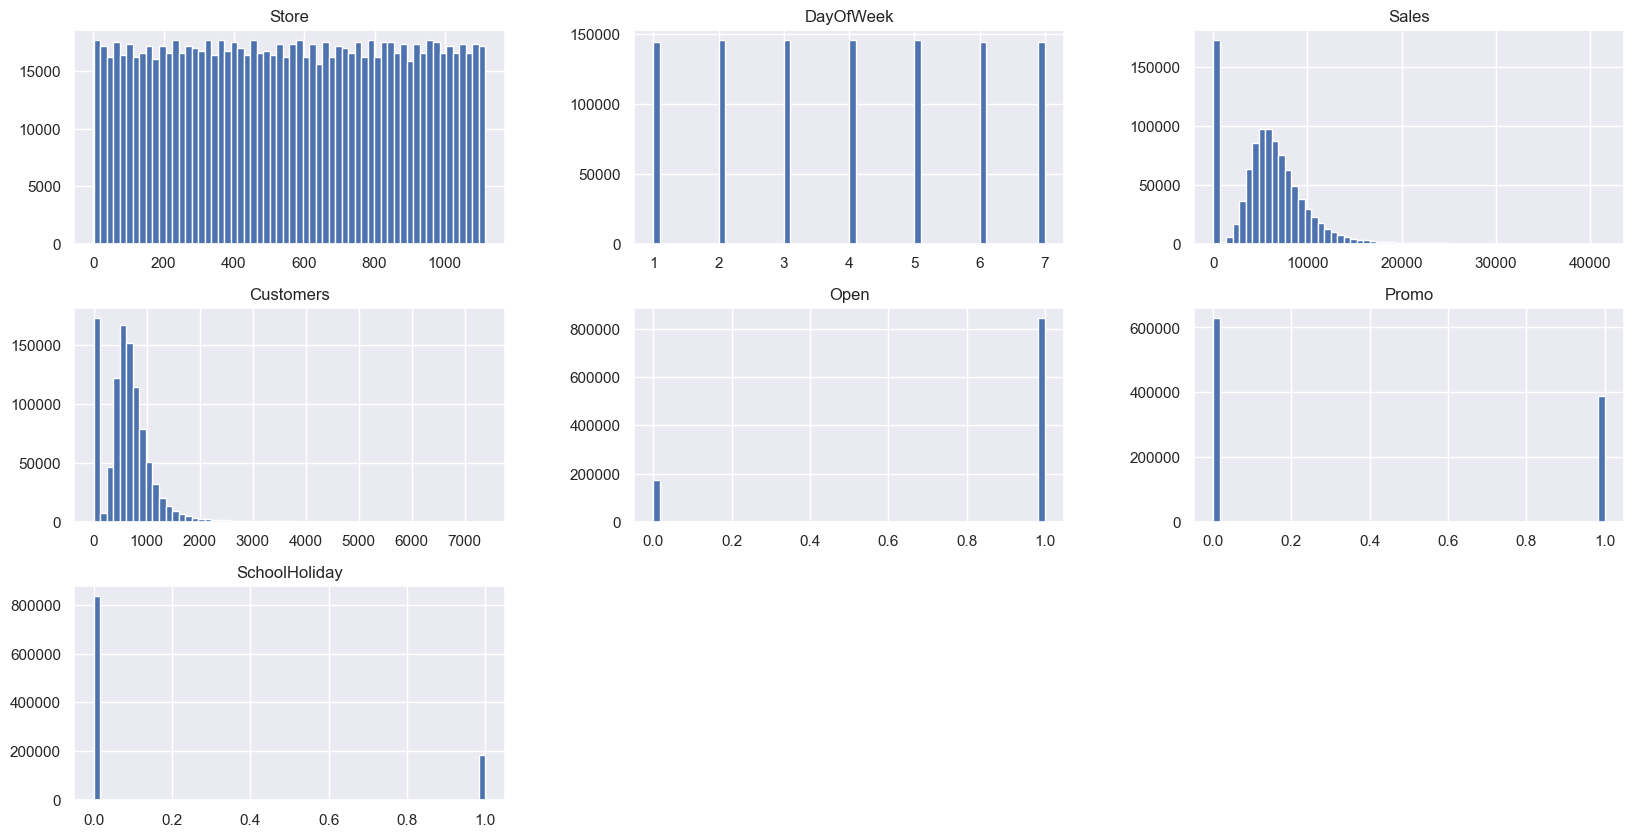

In [9]:
sales_df.hist(figsize=(20, 10), bins = 60)
plt.show()

# Sales

In [10]:
sales_df['Sales'].describe()

count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64

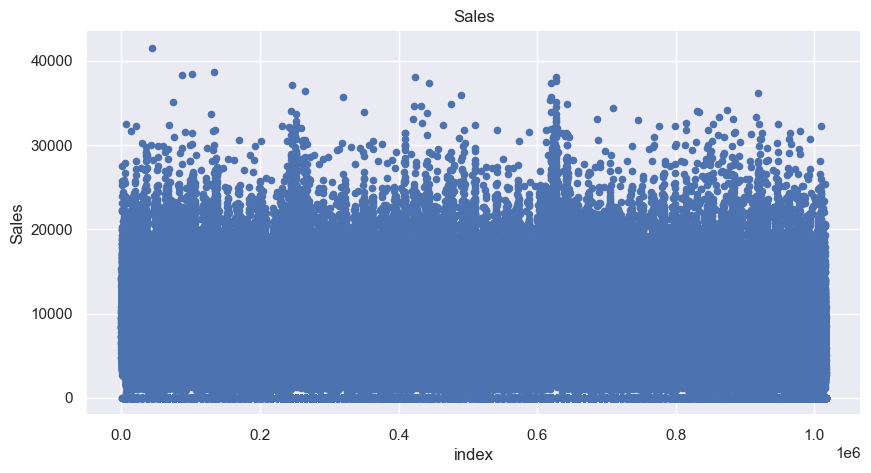

In [11]:
sales_df.reset_index().plot(kind='scatter', y='Sales', x='index', figsize=(10, 5))
plt.title("Sales")
plt.show()

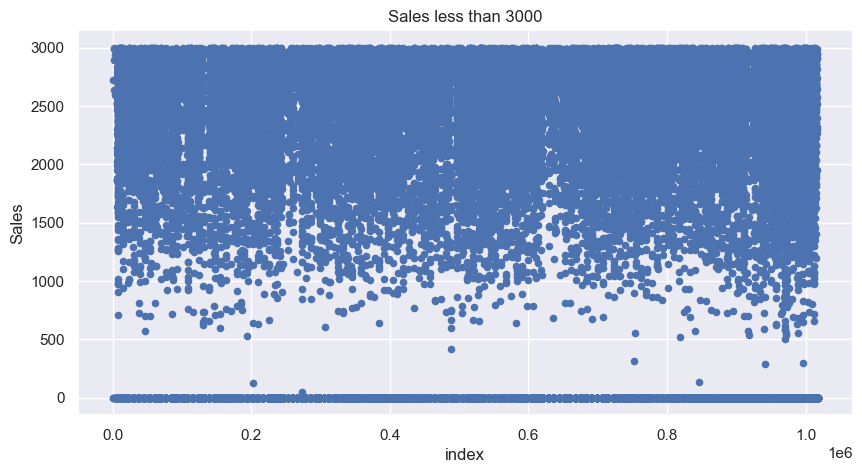

In [12]:
sales_df[sales_df['Sales']<3000].reset_index().plot(kind='scatter', y='Sales', x='index', figsize=(10, 5))
plt.title("Sales less than 3000")
plt.show()

In [13]:
zero_sales = sales_df[sales_df['Sales'] == 0]
print(zero_sales.shape)

(172871, 9)


In [14]:
(zero_sales.shape[0]/sales_df.shape[0])*100

16.994639253093514

Sales_Zeros = 172871

Zeros(%) = 17% of overall sales is zero

# Open

In [15]:
sales_df['Open'].value_counts()

Open
1    844392
0    172817
Name: count, dtype: int64

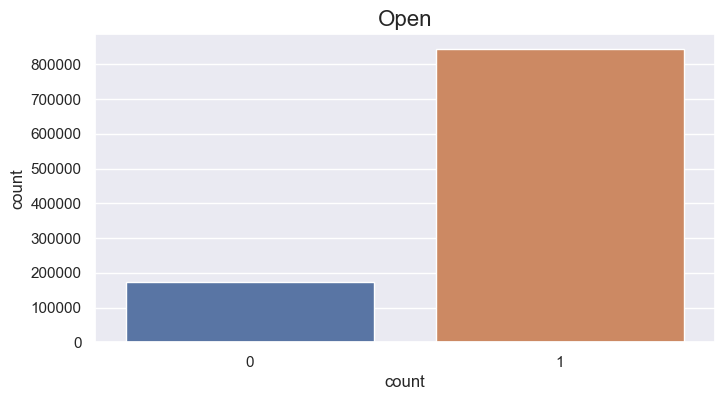

In [16]:
plt.figure(figsize=(8,4))
sns.countplot(data=sales_df, x=sales_df.Open)
plt.title('Open', fontsize=16)
plt.xlabel('count')
plt.show()

In [17]:
sales_df[sales_df['Sales']==0]['Open'].value_counts()

Open
0    172817
1        54
Name: count, dtype: int64

# Customers
[Back to top](#table_of_contents)

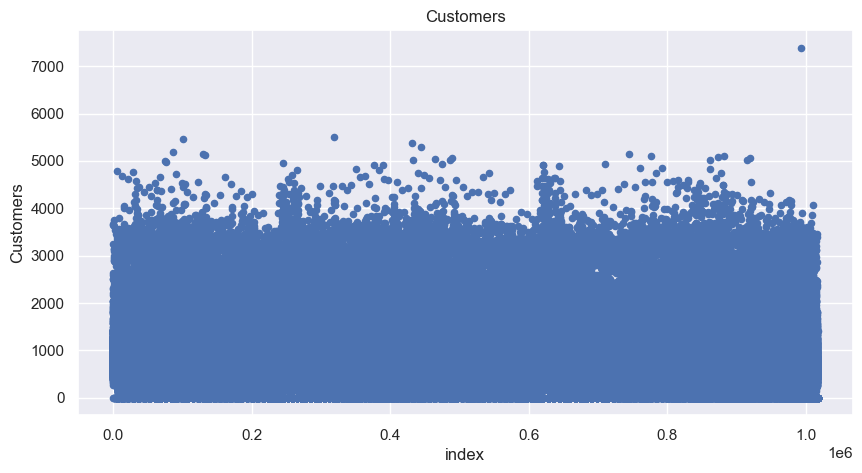

In [18]:
sales_df.reset_index().plot(kind='scatter', y='Customers', x='index', figsize=(10, 5))
plt.title("Customers")
plt.show()

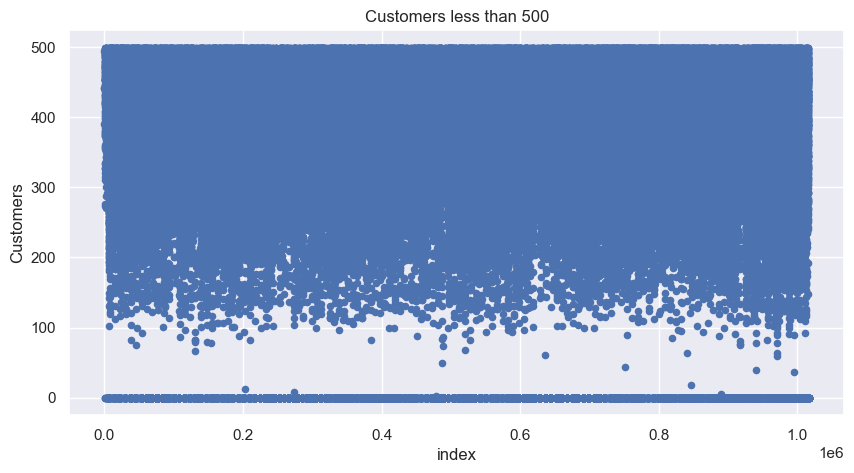

In [19]:
sales_df[sales_df['Customers']<500].reset_index().plot(kind='scatter', y='Customers', x='index', figsize=(10, 5))
plt.title("Customers less than 500")
plt.show()

In [20]:
sales_df[sales_df['Customers'] == 0].shape[0]

172869

In [21]:
sales_df[sales_df['Customers'] == 0]['Open'].value_counts()

Open
0    172817
1        52
Name: count, dtype: int64

[Back to top](#table_of_contents)

# Day Of the week

In [22]:
sales_df['DayOfWeek'].nunique()

7

In [23]:
sales_df['DayOfWeek'].value_counts()

DayOfWeek
5    145845
4    145845
3    145665
2    145664
1    144730
7    144730
6    144730
Name: count, dtype: int64

In [24]:
sales_df[sales_df['Customers'] == 0]['DayOfWeek'].value_counts()

DayOfWeek
7    141137
4     11218
5      7212
1      7173
3      3743
2      1708
6       678
Name: count, dtype: int64

In [25]:
sales_df[sales_df['Sales'] == 0]['DayOfWeek'].value_counts()

DayOfWeek
7    141137
4     11219
5      7212
1      7173
3      3743
2      1709
6       678
Name: count, dtype: int64

In [26]:
sales_df[(sales_df['Open']==0)]['DayOfWeek'].value_counts()

DayOfWeek
7    141137
4     11201
5      7205
1      7170
3      3729
2      1703
6       672
Name: count, dtype: int64

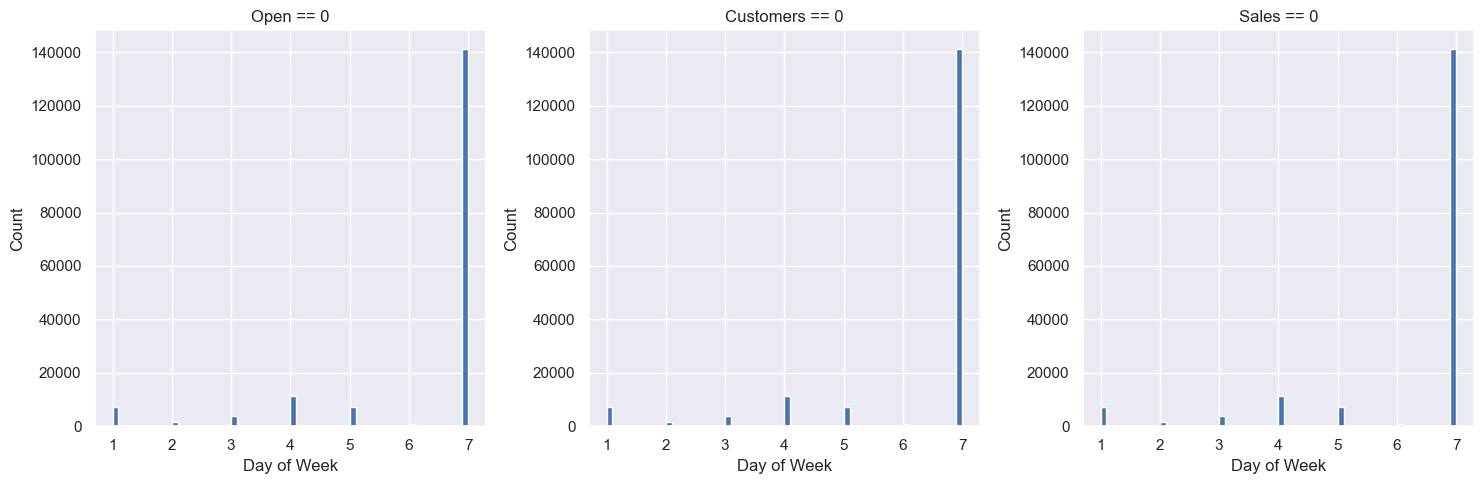

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sales_df[sales_df['Open'] == 0]['DayOfWeek'].hist(bins=60, ax=axes[2])
axes[0].set_title('Open == 0')
axes[0].set_xlabel('Day of Week')
axes[0].set_ylabel('Count')

sales_df[sales_df['Customers'] == 0]['DayOfWeek'].hist(bins=60, ax=axes[0])
axes[1].set_title('Customers == 0')
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Count')

sales_df[sales_df['Sales'] == 0]['DayOfWeek'].hist(bins=60, ax=axes[1])
axes[2].set_title('Sales == 0')
axes[2].set_xlabel('Day of Week')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

observation

most of the times stores are also closed on sunday.
so the sales drop on 7th day (sunday) 

Attribute DayOfWeek is highly correlated with open 

# Sales over years
[Back to top](#table_of_contents)

In [28]:
sale_timeline = sales_df.copy()

In [29]:
sale_timeline['Date'] = pd.to_datetime(sale_timeline['Date'])
sale_timeline['Year'] = sale_timeline['Date'].dt.year

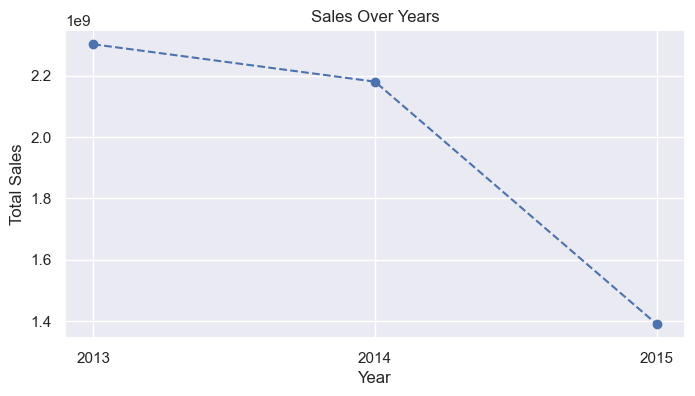

In [30]:
df_yearly_sales = sale_timeline.groupby('Year')['Sales'].sum().reset_index()

plt.figure(figsize=(8, 4))
plt.plot(df_yearly_sales['Year'], df_yearly_sales['Sales'], marker='o', linestyle='--', color='b')
plt.title('Sales Over Years')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(df_yearly_sales['Year'])
plt.show()

# Promo

In [31]:
sales_df['Promo'].value_counts()

Promo
0    629129
1    388080
Name: count, dtype: int64

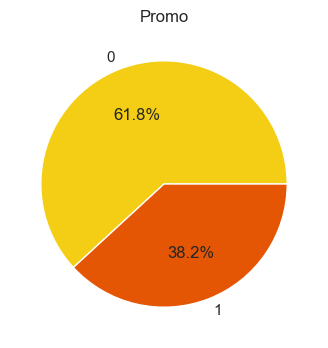

In [32]:
promo_count = sales_df['Promo'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(promo_count, labels=promo_count.index,
        autopct='%1.1f%%', colors=['#F4CE14', '#E55604'])
plt.title('Promo')
plt.show()

# School Holiday

In [33]:
sales_df['SchoolHoliday'].value_counts()

SchoolHoliday
0    835488
1    181721
Name: count, dtype: int64

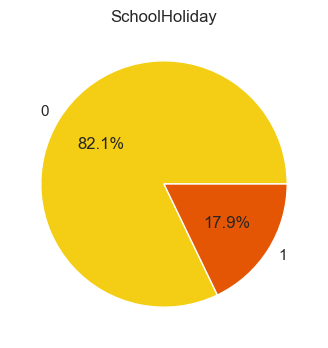

In [34]:
school_holiday_count = sales_df['SchoolHoliday'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(school_holiday_count, labels=school_holiday_count.index,
        autopct='%1.1f%%', colors=['#F4CE14', '#E55604'])
plt.title('SchoolHoliday')
plt.show()

# StateHoliday   

In [35]:
sales_df['StateHoliday'].value_counts()

StateHoliday
0    855087
0    131072
a     20260
b      6690
c      4100
Name: count, dtype: int64

In [36]:
sales_df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

StateHoliday attribute needs correction as the zero(0) is recorded as both int(0) and str ('0')

In [37]:
sales_df['StateHoliday'] = sales_df['StateHoliday'].replace(0, '0')

In [38]:
sales_df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [39]:
sales_df['StateHoliday'].value_counts()

StateHoliday
0    986159
a     20260
b      6690
c      4100
Name: count, dtype: int64

Observations : 

0 - None - (986159) - 97%

a - public holiday -(20260) - 2%

b - easter holiday - (6690) - 0.65%

c - christmas - (4100) - 0.40 %

overall 3 % of Stateholidays recorded.

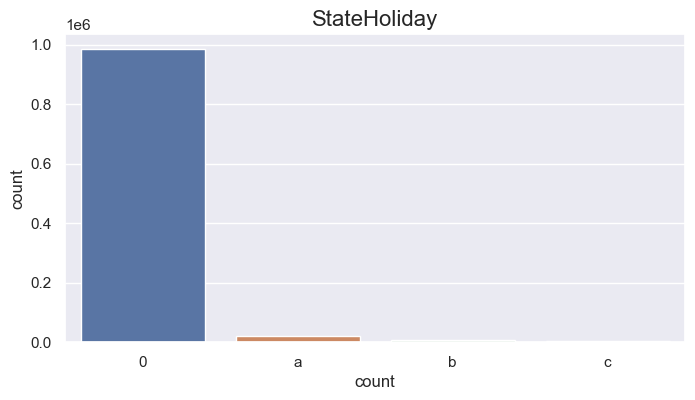

In [40]:
plt.figure(figsize=(8,4))
sns.countplot(data=sales_df, x=sales_df.StateHoliday)
plt.title('StateHoliday', fontsize=16)
plt.xlabel('count')
plt.show()

# Outliers analysis

## Sales

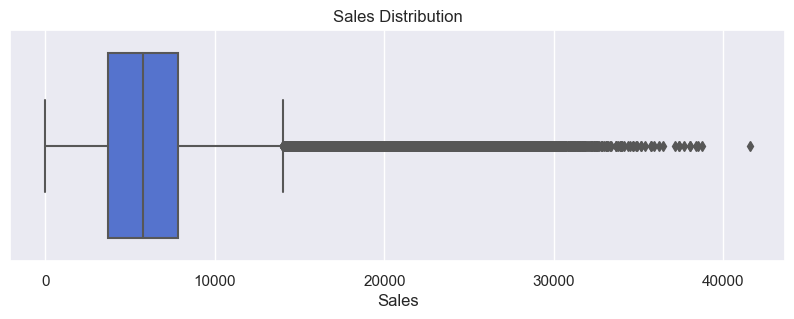

In [41]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=sales_df.Sales, showfliers=True, showbox=True, whis=1.5, color='royalblue')
plt.title('Sales Distribution')
plt.show()

## Customers

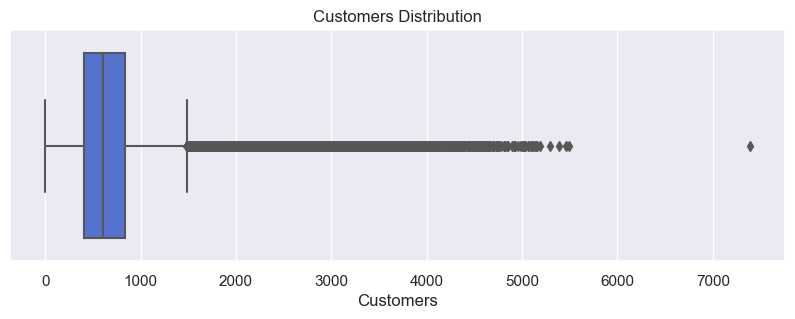

In [42]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=sales_df.Customers, showfliers=True, showbox=True, whis=1.5, color='royalblue')
plt.title('Customers Distribution')
plt.show()

## Skewness analysis

In [43]:
pd.DataFrame.from_dict(dict(
    {
        'Sales':sales_df.Sales.skew(), 
        'Customers':sales_df.Customers.skew()
    }), orient='index', columns=['Skewness'])

,Skewness
Sales,0.64146
Customers,1.59865


1. Minimal skewness for Sales attribute as skewness less than 1
2. Customers attribute is highly skewed towards right.

## Correlation of Sales features

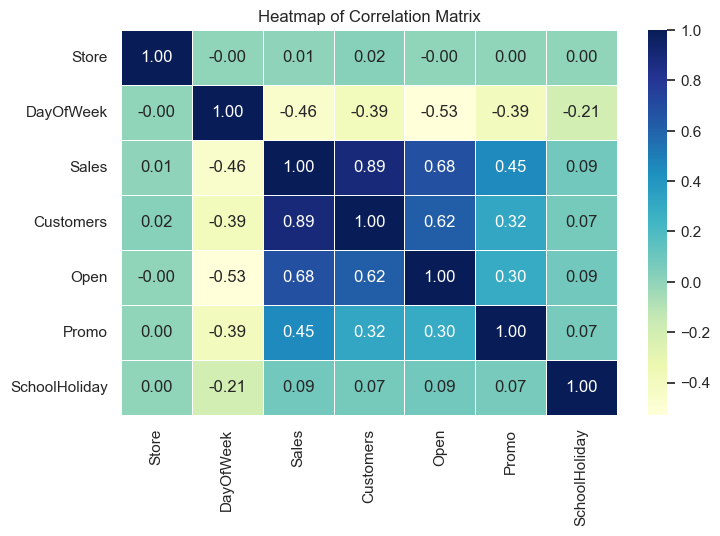

In [44]:
df = sales_df.select_dtypes(include=np.number)
correlation_matrix = df.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5)
plt.title("Heatmap of Correlation Matrix")
plt.show()

## 3.2 Stores Data EDA <a id='Stores_EDA'></a>
[Back to top](#table_of_contents)

In [45]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [46]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [47]:
df_store.isna().sum() # checking for missing values

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

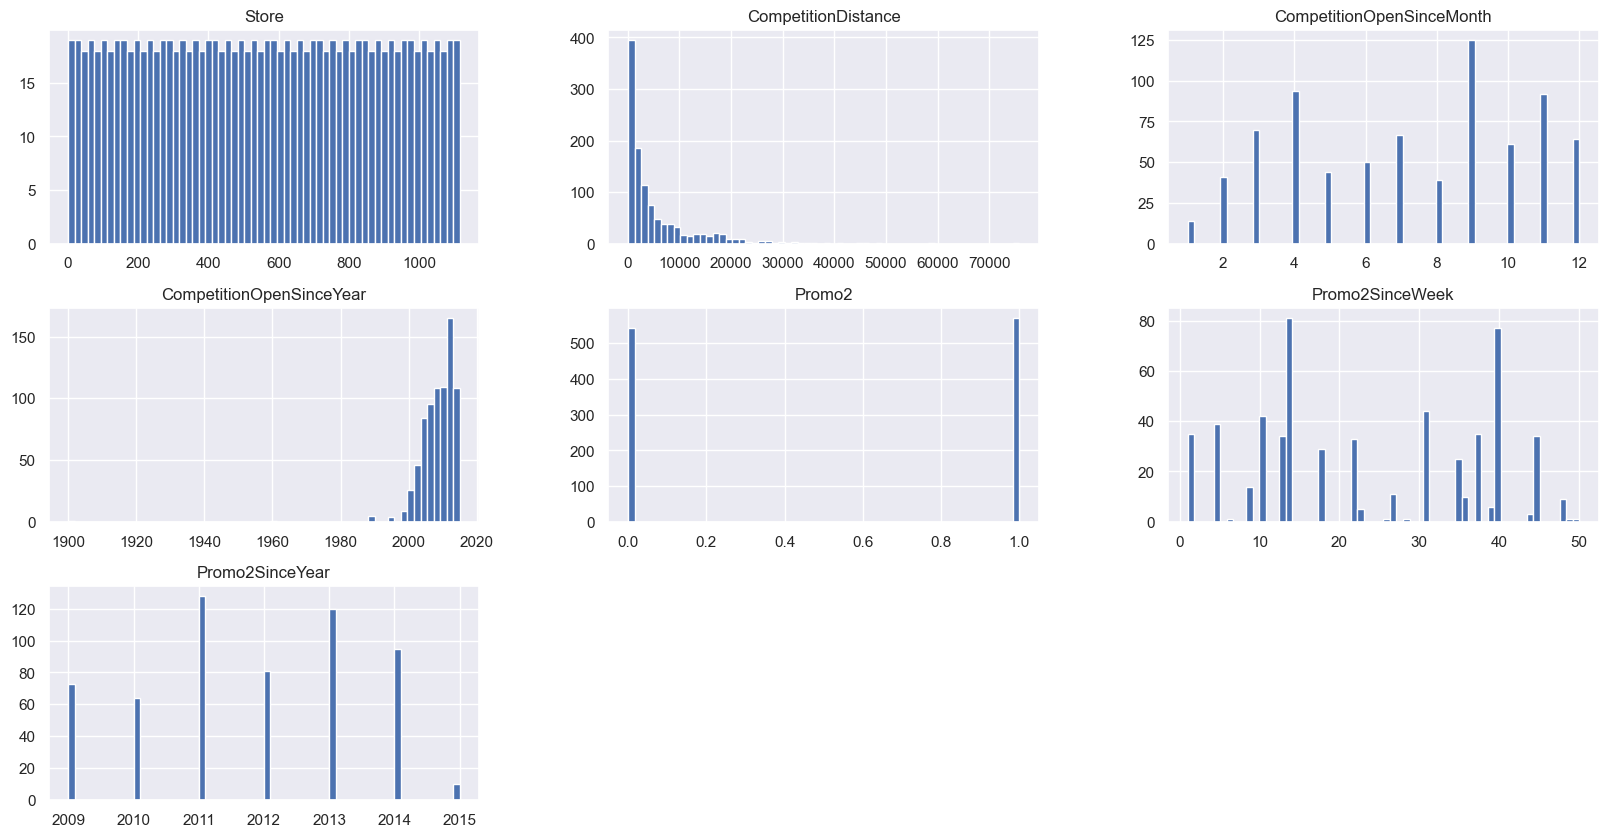

In [48]:
df_store.hist(figsize=(20, 10), bins = 60)
plt.show()

In [49]:
df_store[df_store['Promo2']==0].shape

(544, 10)

In [50]:
df_store[df_store['Promo2']==0].head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN


In [51]:
df_store['PromoInterval'].unique()

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

No data recorded in attributes 'Promo2SinceWeek','Promo2SinceYear' and 'PromoInterval' 

as the store is not participating in the Promo2 (Promo2 = 0)

# StoreType

In [52]:
df_store['StoreType'].value_counts()

StoreType
a    602
d    348
c    148
b     17
Name: count, dtype: int64

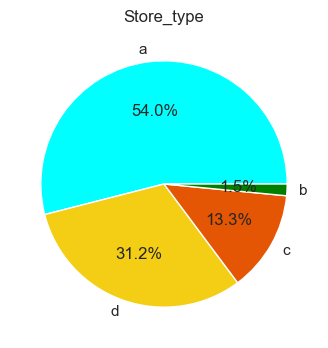

In [53]:
Store_type = df_store['StoreType'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(Store_type, labels=Store_type.index,
        autopct='%1.1f%%', colors=['aqua', '#F4CE14', '#E55604', 'green'])
plt.title('Store_type')
plt.show()

# Assortment

In [54]:
df_store['Assortment'].value_counts()

Assortment
a    593
c    513
b      9
Name: count, dtype: int64

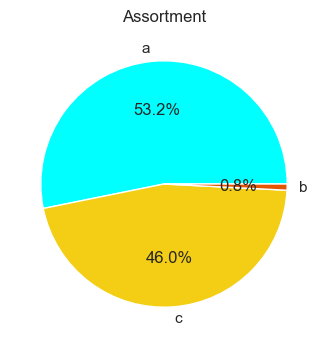

In [55]:
Assortment = df_store['Assortment'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(Assortment, labels=Assortment.index,
        autopct='%1.1f%%', colors=['aqua', '#F4CE14', '#E55604', 'green'])
plt.title('Assortment')
plt.show()

In [ ]:
# assortment

# 4. Data cleaning <a id='data_cleaning'></a>
[Back to top](#table_of_contents)

# 5. Feature engineering <a id='feature_engineering'></a>
[Back to top](#table_of_contents)

# 6. Model training <a id='model_training'></a>
[Back to top](#table_of_contents)